In [10]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt

df = pd.read_csv('/Users/zhouwenjun/Desktop/DATA 1030 Final Project Data/2015_data.csv')

#print(df.head())



/var/folders/b6/mjk42qhj6q3d2xkg39_smlz00000gn/T/ipykernel_59102/851239670.py:6: DtypeWarning: Columns (40,41,42,43,61,62,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/zhouwenjun/Desktop/DATA 1030 Final Project Data/2015_data.csv')


In [118]:
print(df.shape)

(2718198, 78)


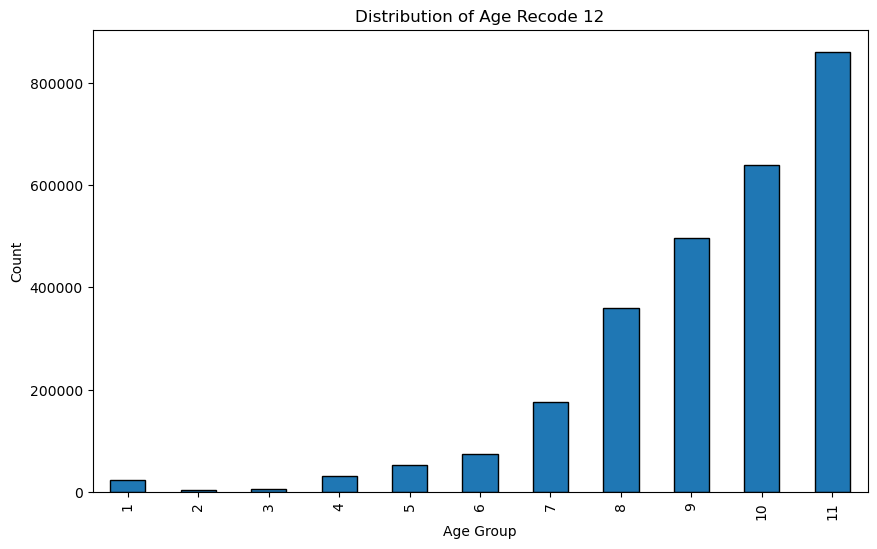

In [119]:
# Plotting age recode distribution
plt.figure(figsize=(10, 6))
df_cleaned['age_recode_12'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.title('Distribution of Age Recode 12')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


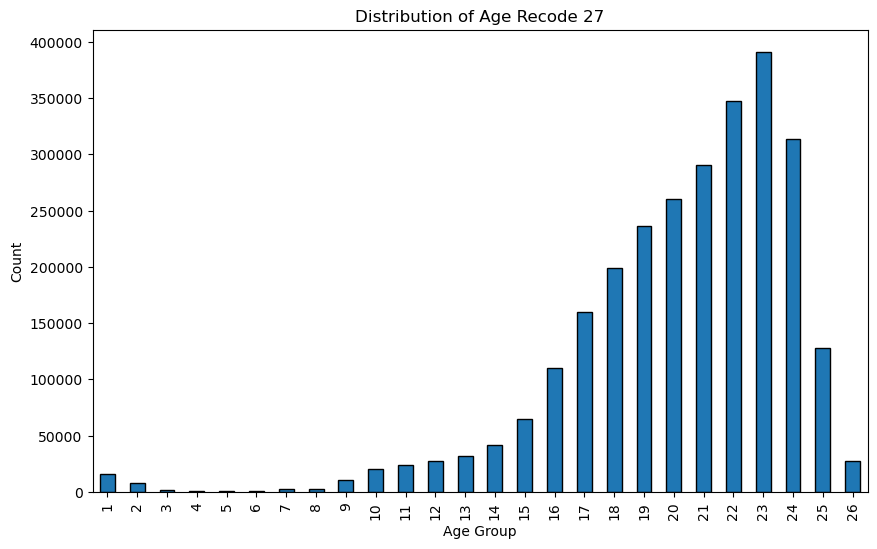

In [122]:
# Plotting age recode distribution
plt.figure(figsize=(10, 6))
df_cleaned['age_recode_27'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.title('Distribution of Age Recode 27')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


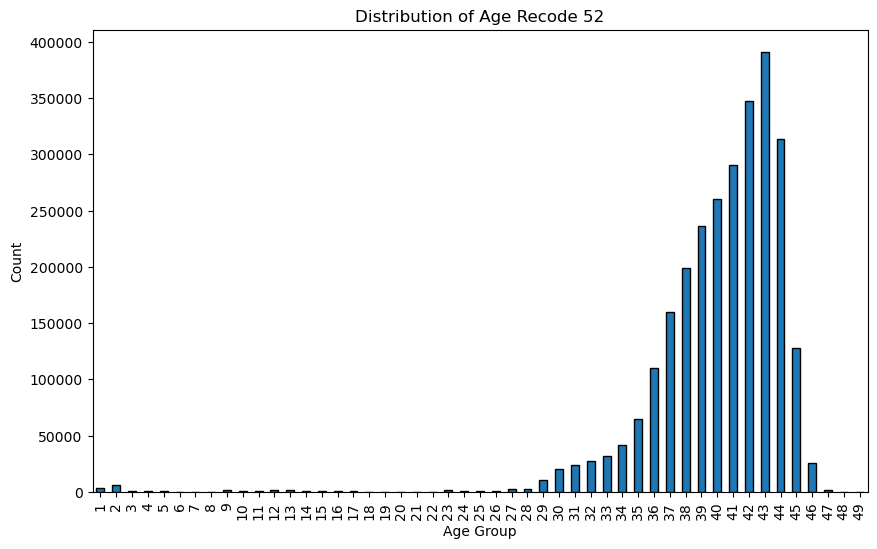

In [121]:
# Plotting age recode distribution
plt.figure(figsize=(10, 6))
df_cleaned['age_recode_52'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.title('Distribution of Age Recode 52')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


In [29]:
print(df['detail_age'].shape)
print(df['detail_age'].value_counts())
print(df['detail_age'].describe())

(2718198,)
(2718198,)
detail_age
87     80207
88     79107
86     77752
85     77610
89     76322
       ...  
112       14
113        7
114        7
116        3
115        2
Name: count, Length: 117, dtype: int64
count    2.718198e+06
mean     7.345519e+01
std      2.230170e+01
min      1.000000e+00
25%      6.300000e+01
50%      7.700000e+01
75%      8.700000e+01
max      9.990000e+02
Name: detail_age, dtype: float64


In [117]:
# Count the rows where 'detail_age' is greater than 900
count_above_900 = len(df[df['detail_age'] == 999])
total_data = df['detail_age'].shape[0]
proportion_null_age = count_above_900/total_data
print(proportion_null_age)
df_cleaned = df[df['detail_age'] != 999]

0.00019902891548003493
541


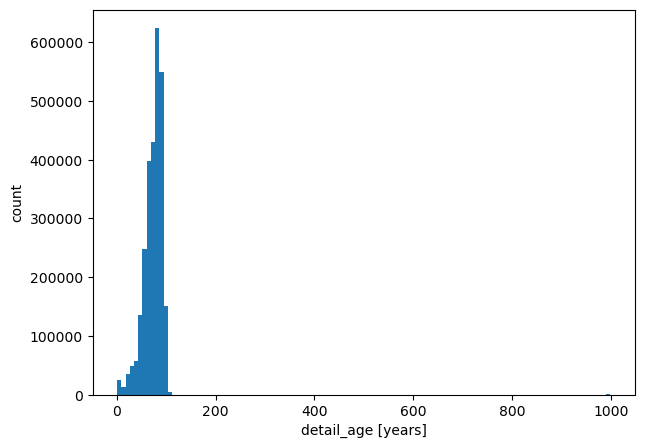

In [116]:
plt.figure(figsize=(7,5))

df['detail_age'].plot.hist(bins = df['detail_age'].nunique())   
plt.xlabel('detail_age [years]')
plt.ylabel('count')
plt.show()

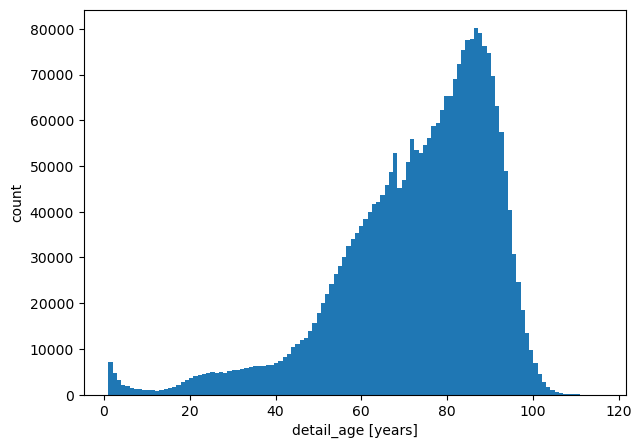

In [80]:
plt.figure(figsize=(7,5))

df_cleaned['detail_age'].plot.hist(bins = df_cleaned['detail_age'].nunique())   
plt.xlabel('detail_age [years]')
plt.ylabel('count')
plt.show()

In [76]:
max_age = df['detail_age'].max()
print("Maximum age:", max_age)

Maximum age: 999


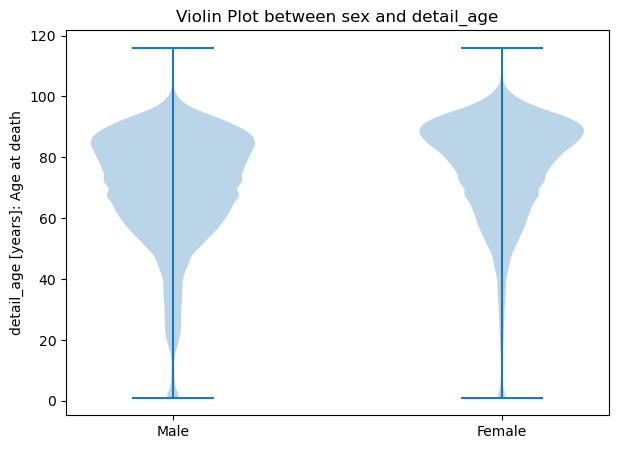

In [92]:
dataset = [df_cleaned[df_cleaned['sex']=='M']['detail_age'].values,
           df_cleaned[df_cleaned['sex']=='F']['detail_age'].values]

plt.figure(figsize=(7,5))

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['Male','Female'])
plt.ylabel('detail_age [years]: Age at death')
plt.title('Violin Plot between sex and detail_age')
plt.show()

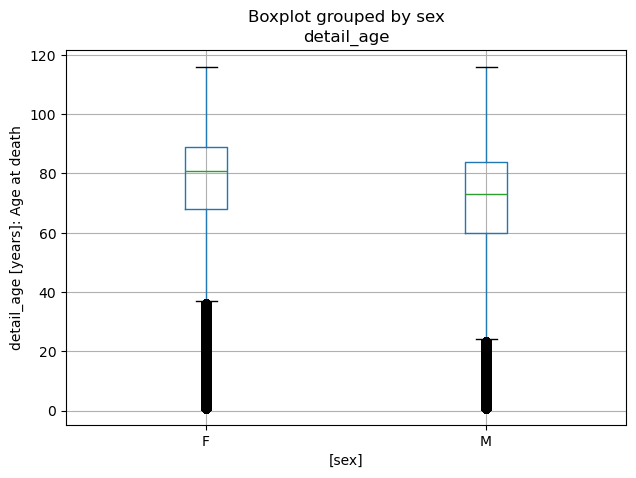

In [93]:
df_cleaned[['detail_age','sex']].boxplot(by='sex',figsize=(7,5))
plt.ylabel('detail_age [years]: Age at death')
plt.show()

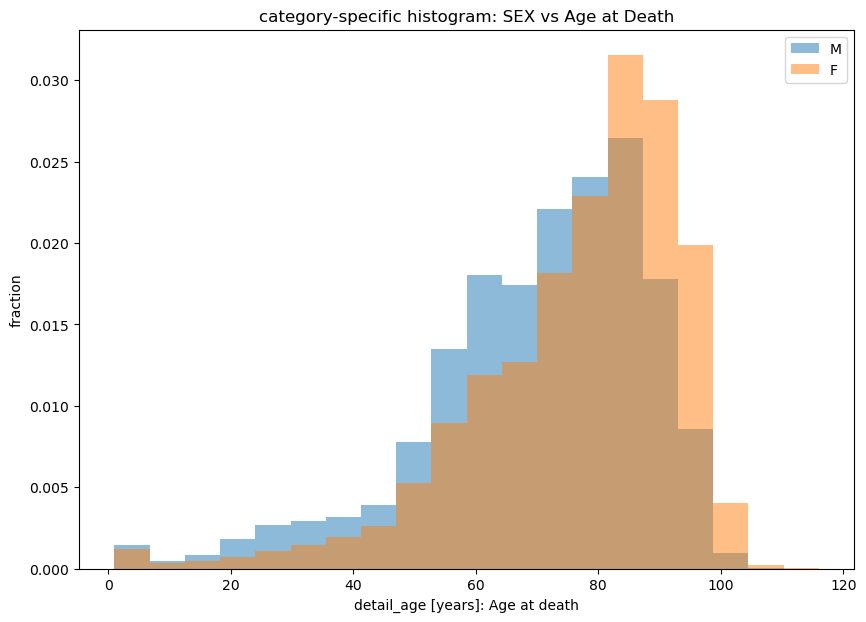

In [115]:
from matplotlib import pylab as plt

categories = df_cleaned['sex'].unique()
bin_range = (df_cleaned['detail_age'].min(),df_cleaned['detail_age'].max())

plt.figure(figsize=(10,7))

for c in categories:
    plt.hist(df_cleaned[df_cleaned['sex']==c]['detail_age'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('detail_age [years]: Age at death')
plt.title('category-specific histogram: SEX vs Age at Death')
plt.show()

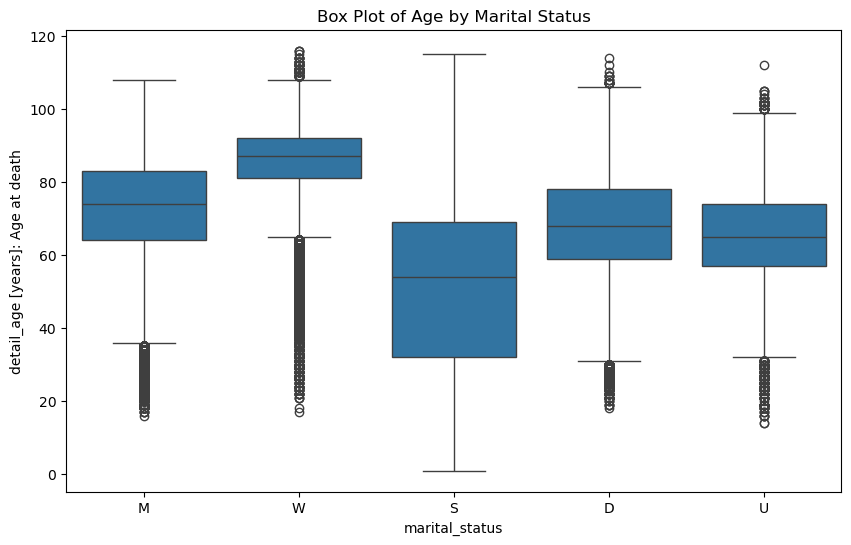

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot to visualize the relationship between marital status and detail_age
plt.figure(figsize=(10, 6))
sns.boxplot(x='marital_status', y='detail_age', data=df_cleaned)
plt.title('Box Plot of Age by Marital Status')
plt.xlabel('marital_status')
plt.ylabel('detail_age [years]: Age at death')
plt.show()


/var/folders/b6/mjk42qhj6q3d2xkg39_smlz00000gn/T/ipykernel_59102/2335204642.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(marital_status_labels)


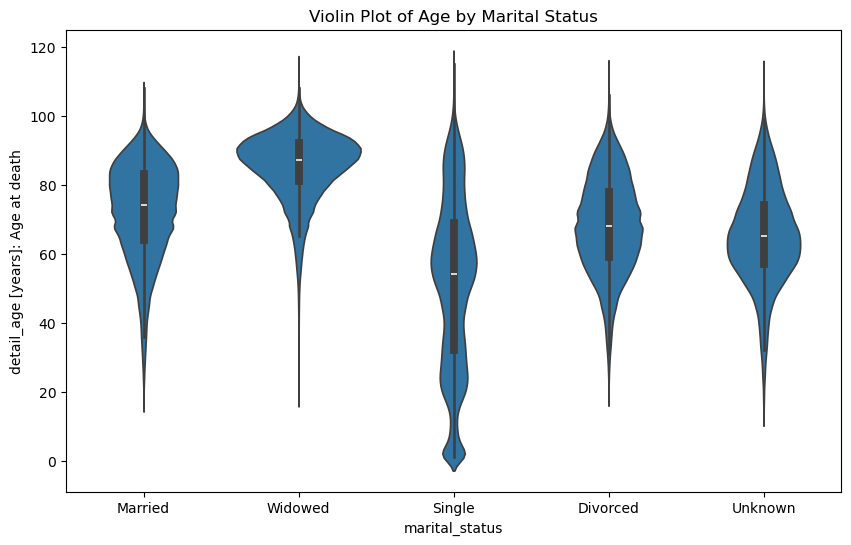

In [112]:
# Define the marital status labels corresponding to the codes
marital_status_labels = ['Married', 'Widowed', 'Single', 'Divorced', 'Unknown']

# Violin plot to visualize the distribution of age by marital status
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x='marital_status', y='detail_age', data=df_cleaned)

# Set custom x-axis labels using set_xticklabels
ax.set_xticklabels(marital_status_labels)

# Add labels and title
plt.title('Violin Plot of Age by Marital Status')
plt.xlabel('marital_status')
plt.ylabel('detail_age [years]: Age at death')

plt.show()


/var/folders/b6/mjk42qhj6q3d2xkg39_smlz00000gn/T/ipykernel_59102/3650944035.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(race_labels, rotation=60, ha='center')


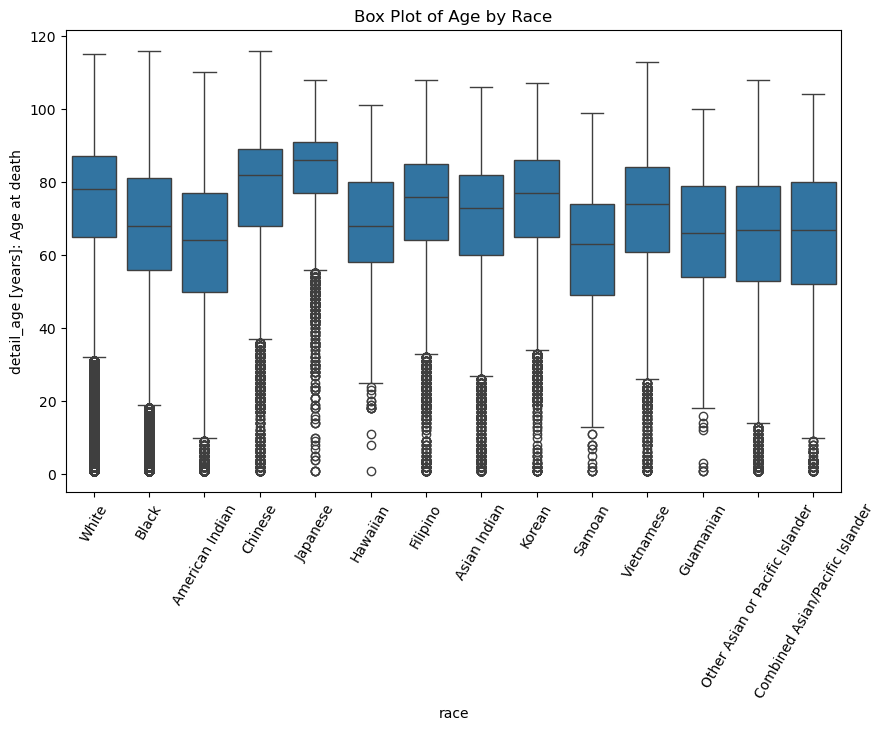

In [109]:
# Define a mapping for the race labels
race_labels = [
    'White', 'Black', 'American Indian', 'Chinese', 'Japanese', 
    'Hawaiian', 'Filipino', 'Asian Indian', 'Korean', 'Samoan', 
    'Vietnamese', 'Guamanian', 'Other Asian or Pacific Islander', 
    'Combined Asian/Pacific Islander'
]  # Add labels as per your dataset

# Box plot to visualize the relationship between race and detail_age
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='race', y='detail_age', data=df_cleaned)

# Set custom x-axis labels using set_xticklabels without changing the DataFrame
ax.set_xticklabels(race_labels, rotation=60, ha='center')

# Add labels and title
plt.title('Box Plot of Age by Race')
plt.xlabel('race')
plt.ylabel('detail_age [years]: Age at death')

plt.show()


In [138]:
print(df_cleaned['race'].value_counts())

race
1     2310692
2      320644
3       19040
4       14525
7       12036
5        8512
68       8219
18       8129
48       5568
28       5368
78       3101
6         749
38        683
58        391
Name: count, dtype: int64


In [131]:
# Proportion of singles under 40
young_single = df_cleaned[(df_cleaned['detail_age'] < 40) & (df_cleaned['marital_status'] == 'S')].shape[0]
young_total = df_cleaned[df_cleaned['detail_age'] < 40].shape[0]
young_single_percentage = (young_single / young_total) * 100
print(f"Percentage of death singles under 40: {young_single_percentage}%")

# Proportion of widows over 80
old_widowed = df_cleaned[(df_cleaned['detail_age'] > 80) & (df_cleaned['marital_status'] == 'W')].shape[0]
old_total = df_cleaned[df_cleaned['detail_age'] > 80].shape[0]
old_widowed_percentage = (old_widowed / old_total) * 100
print(f"Percentage of death widows over 80: {old_widowed_percentage}%")

# Median age by marital status
median_age_single = df_cleaned[df_cleaned['marital_status'] == 'S']['detail_age'].median()
median_age_widowed = df_cleaned[df_cleaned['marital_status'] == 'W']['detail_age'].median()
print("Median age for singles death:", median_age_single)
print("Median age for widowed death:", median_age_widowed)
# Median age by marital status
median_age_married = df_cleaned[df_cleaned['marital_status'] == 'M']['detail_age'].median()
median_age_divorced = df_cleaned[df_cleaned['marital_status'] == 'D']['detail_age'].median()
print("Median age for divorced death:", median_age_divorced)
print("Median age for married death:", median_age_married)


Percentage of death singles under 40: 76.7821192325075%
Percentage of death widows over 80: 60.597767803600334%
Median age for singles death: 54.0
Median age for widowed death: 87.0
Median age for divorced death: 68.0
Median age for married death: 74.0


In [133]:
median_age_female = df_cleaned[df_cleaned['sex'] == 'F']['detail_age'].median()
median_age_male = df_cleaned[df_cleaned['sex'] == 'M']['detail_age'].median()

print ("Median age for female death", median_age_female)
print ("Median age for male death", median_age_male)

Median age for female death 81.0
Median age for male death 73.0


01 ... White
02 ... Black
03 ... American Indian (includes Aleuts and Eskimos)
04 ... Chinese
05 ... Japanese
06 ... Hawaiian (includes Part-Hawaiian)
07 ... Filipino
18 ... Asian Indian
28 ... Korean
38 ... Samoan
48 ... Vietnamese
58 ... Guamanian
68 ... Other Asian or Pacific Islander in areas reporting codes 18-58
78 ... Combined other Asian or Pacific Islander, includes codes 18-68
for areas that do not report them separately

In [146]:
median_age_white = df_cleaned[df_cleaned['race'] == 1]['detail_age'].median()
median_age_black = df_cleaned[df_cleaned['race'] == 2]['detail_age'].median()
median_age_american_indian = df_cleaned[df_cleaned['race'] == 3]['detail_age'].median()
median_age_chinese = df_cleaned[df_cleaned['race'] == 4]['detail_age'].median()
median_age_japanese = df_cleaned[df_cleaned['race'] == 5]['detail_age'].median()
median_age_hawaiian = df_cleaned[df_cleaned['race'] == 6]['detail_age'].median()
median_age_pilipino = df_cleaned[df_cleaned['race'] == 7]['detail_age'].median()
median_age_asian_indian = df_cleaned[df_cleaned['race'] == 18]['detail_age'].median()
median_age_korean = df_cleaned[df_cleaned['race'] == 28]['detail_age'].median()
median_age_samoan = df_cleaned[df_cleaned['race'] == 38]['detail_age'].median()
median_age_vietnamese = df_cleaned[df_cleaned['race'] == 48]['detail_age'].median()
median_age_guamanian = df_cleaned[df_cleaned['race'] == 58]['detail_age'].median()
median_age_other_asian_pacific_islander = df_cleaned[df_cleaned['race'] == 68]['detail_age'].median()
median_age_combined_other_asian_pacific_islander = df_cleaned[df_cleaned['race'] == 78]['detail_age'].median()
 

print("Median age for White:", median_age_white)
print("Median age for Black:", median_age_black)
print("Median age for American Indian:", median_age_american_indian)
print("Median age for Chinese:", median_age_chinese)
print("Median age for Japanese:", median_age_japanese)
print("Median age for Hawaiian:", median_age_hawaiian)
print("Median age for Pilipino:", median_age_pilipino)
print("Median age for Asian Indian:", median_age_asian_indian)
print("Median age for Korean:", median_age_korean)
print("Median age for Samoan:", median_age_samoan)
print("Median age for Vietnamese:", median_age_vietnamese)
print("Median age for Guamanian:", median_age_guamanian)
print("Median age for Other Asian Pacific Islander:", median_age_other_asian_pacific_islander)
print("Median age for Combined Other Asian Pacific Islander:", median_age_combined_other_asian_pacific_islander)

Median age for White: 78.0
Median age for Black: 68.0
Median age for American Indian: 64.0
Median age for Chinese: 82.0
Median age for Japanese: 86.0
Median age for Hawaiian: 68.0
Median age for Pilipino: 76.0
Median age for Asian Indian: 73.0
Median age for Korean: 77.0
Median age for Samoan: 63.0
Median age for Vietnamese: 74.0
Median age for Guamanian: 66.0
Median age for Other Asian Pacific Islander: 67.0
Median age for Combined Other Asian Pacific Islander: 67.0


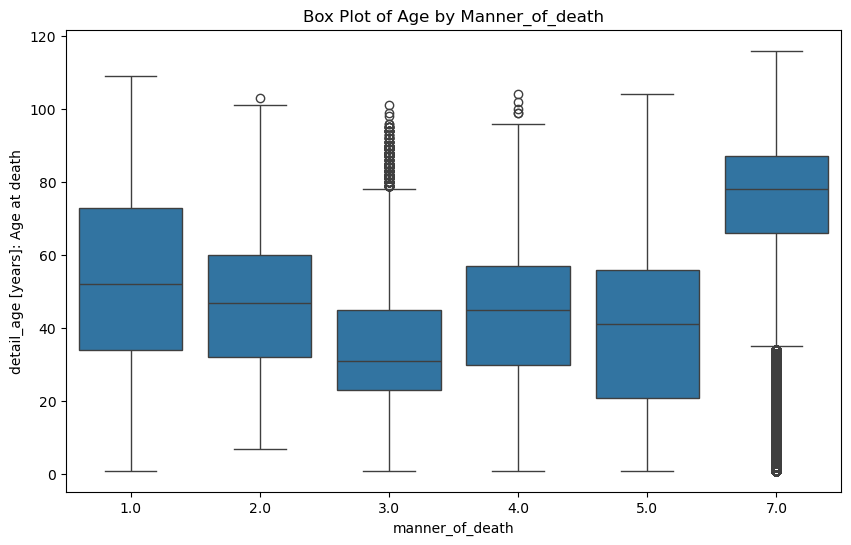

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot to visualize the relationship between manner_of_death and detail_age
plt.figure(figsize=(10, 6))
sns.boxplot(x='manner_of_death', y='detail_age', data=df_cleaned)
plt.title('Box Plot of Age by Manner_of_death')
plt.xlabel('manner_of_death')
plt.ylabel('detail_age [years]: Age at death')
plt.show()


/var/folders/b6/mjk42qhj6q3d2xkg39_smlz00000gn/T/ipykernel_59102/2804196962.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(manner_labels, rotation=45, ha='center')


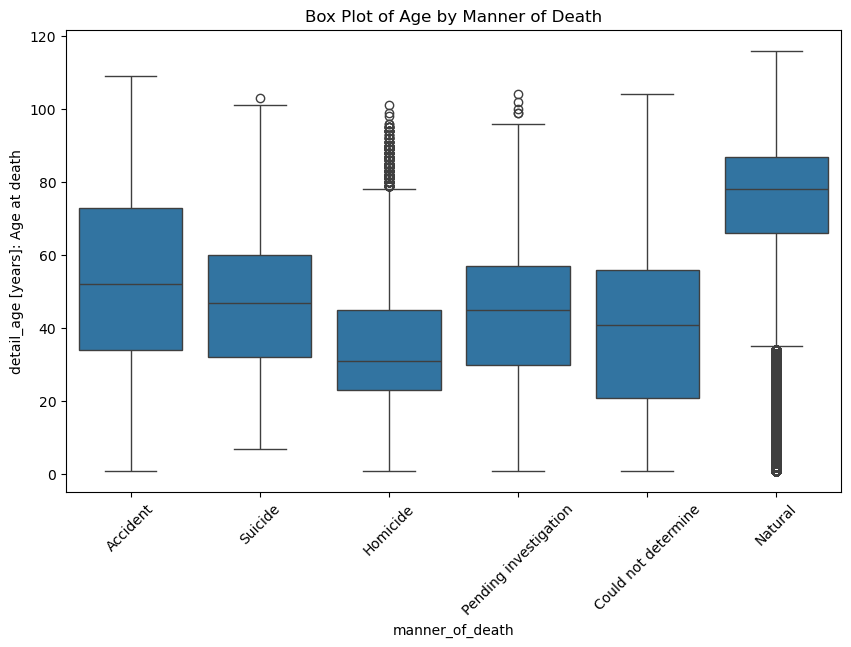

In [157]:

manner_labels = [
    'Accident', 'Suicide', 'Homicide', 'Pending investigation', 'Could not determine', 
    'Natural'
] 



# Box plot to visualize the relationship between race and detail_age
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='manner_of_death', y='detail_age', data=df_cleaned)

# Set custom x-axis labels using set_xticklabels without changing the DataFrame
ax.set_xticklabels(manner_labels, rotation=45, ha='center')

# Add labels and title
plt.title('Box Plot of Age by Manner of Death')
plt.xlabel('manner_of_death')
plt.ylabel('detail_age [years]: Age at death')

plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
help(StandardScaler)

In [154]:
print(df_cleaned['detail_age'].describe())

print(df_cleaned['detail_age'].median())

count    2.717657e+06
mean     7.327095e+01
std      1.808044e+01
min      1.000000e+00
25%      6.300000e+01
50%      7.700000e+01
75%      8.700000e+01
max      1.160000e+02
Name: detail_age, dtype: float64
77.0


In [160]:
# Calculate the median age for each manner of death
median_age_accident = df_cleaned[df_cleaned['manner_of_death'] == 1]['detail_age'].median()
median_age_suicide = df_cleaned[df_cleaned['manner_of_death'] == 2]['detail_age'].median()
median_age_homicide = df_cleaned[df_cleaned['manner_of_death'] == 3]['detail_age'].median()
median_age_pending_investigation = df_cleaned[df_cleaned['manner_of_death'] == 4]['detail_age'].median()
median_age_could_not_determine = df_cleaned[df_cleaned['manner_of_death'] == 5]['detail_age'].median()
median_age_self_inflicted = df_cleaned[df_cleaned['manner_of_death'] == 6]['detail_age'].median()
median_age_natural = df_cleaned[df_cleaned['manner_of_death'] == 7]['detail_age'].median()
median_age_not_specified = df_cleaned[df_cleaned['manner_of_death'].isna()]['detail_age'].median()

# Print the results
print(f"Median age for manner of death 'Accident': {median_age_accident}")
print(f"Median age for manner of death 'Suicide': {median_age_suicide}")
print(f"Median age for manner of death 'Homicide': {median_age_homicide}")
print(f"Median age for manner of death 'Pending investigation': {median_age_pending_investigation}")
print(f"Median age for manner of death 'Could not determine': {median_age_could_not_determine}")
print(f"Median age for manner of death 'Self-Inflicted': {median_age_self_inflicted}")
print(f"Median age for manner of death 'Natural': {median_age_natural}")
print(f"Median age for manner of death 'Not specified': {median_age_not_specified}")


Median age for manner of death 'Accident': 52.0
Median age for manner of death 'Suicide': 47.0
Median age for manner of death 'Homicide': 31.0
Median age for manner of death 'Pending investigation': 45.0
Median age for manner of death 'Could not determine': 41.0
Median age for manner of death 'Self-Inflicted': nan
Median age for manner of death 'Natural': 78.0
Median age for manner of death 'Not specified': 79.0
